# Question-5

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from time import time

## Part-1

In [149]:
def lowpass(img,k=3, s=1, padding=True):
    img = img.astype(np.float64)
    if padding:
        pad_size = k//2
        img = np.pad(img,(pad_size,pad_size+1),mode='edge')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - k)//s +1
    cols = (w - k)//s +1
    out = np.zeros((rows,cols))
    
    
    #non-vectorised code. Slowed than vectorised one and optimised one
#     for i in range(rows):
#         for j in range(cols):
#             curr = 0
#             for a in range(i,i+k):
#                 for b in range(j,j+k):
#                     curr += img[a,b]
#             out[i,j] = curr/(k*k)
     
   #vectorised code. Faster than optimised so I used non-vectorised code.
    for i in range(rows):
        for j in range(cols):
            curr = img[i:i+k,j:j+k]
            out[i,j] = np.sum(curr)/(k*k)
            
    return out.astype(np.uint8)

def median_filter(img,k = 3, s=1, padding=True):
    img = img.astype(np.float64)
    if padding:
        pad_size = k//2
        img = np.pad(img,(pad_size,pad_size),mode='constant')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - k)//s +1
    cols = (w - k)//s +1
    
    out = np.zeros((rows,cols))
    
    for i in range(rows):
        for j in range(cols):
            out[i,j] = np.median(img[i:i+k,j:j+k])

    return out.astype(np.uint8)

## Part-2

In [150]:
def optim_lowpass(img, k=3, s=1, padding=True):
    img = img.astype(np.float64)
    if padding:
        pad_size = k//2
        img = np.pad(img,(pad_size,pad_size+1),mode='edge')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - k)//s +1
    cols = (w - k)//s +1
    out = np.zeros((rows,cols))
    
    val = np.mean(np.mean(img[0:k,0:k],axis=0),axis=0)
    for i in range(rows):
        if i!=0:
            val = out[i-1,0] + np.sum(img[i+k-1,0:k])/(k*k) - np.sum(img[i-1,0:k])/(k*k)
        for j in range(cols):
            out[i,j] = (val)
            if j!=cols-1:
                   val = val + np.sum(img[i:i+k,j+k])/(k*k) - np.sum(img[i:i+k,j])/(k*k)
    return out.astype(np.uint8)

In [151]:
k = [3,5,7,9]
d = [64,128,256]
out = np.zeros((3,4))
out1 = np.zeros((3,4))
m = 0
n = 0
for i in d:
    img = np.ones((i,i))
    for j in k:
        a = time()
        temp = lowpass(img,j)
        b = time()
        out[m,n] = b-a
        n+=1
    n = 0
    m+=1
m = n = 0
for i in d:
    img = np.ones((i,i))
    for j in k:
        a = time()
        temp = optim_lowpass(img,j)
        b = time()
        out1[m,n] = b-a
        n+=1
    n = 0
    m+=1

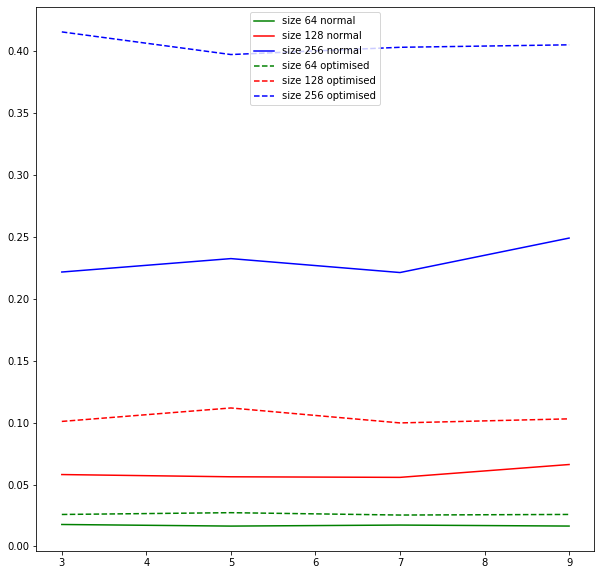

dashed line is optimised code and smooth line is normal code


In [152]:
plt.figure(figsize=(10,10))
plt.plot(k[:],out[0,:],color='green',label = "size "+str(d[0])+" normal")
plt.plot(k[:],out[1,:],color='red',label = "size "+str(d[1])+" normal")
plt.plot(k[:],out[2,:],color='blue',label = "size "+str(d[2])+" normal")

plt.plot(k[:],out1[0,:],color='green',linestyle='dashed',label = "size "+str(d[0])+" optimised")
plt.plot(k[:],out1[1,:],color='red',linestyle='dashed',label = "size "+str(d[1])+" optimised")
plt.plot(k[:],out1[2,:],color='blue',linestyle='dashed',label = "size "+str(d[2])+" optimised")
plt.legend()
plt.show()
print("dashed line is optimised code and smooth line is normal code")


## Part-3

In [153]:
def finding_median(c,k):
    a = 0
    for i in range(c.size):
        a += c[i]
        if a > (k*k)//2:
            return i
    return 255

def optim_median_filter(img,k = 3, s=1, padding=True):
    if padding:
        pad_size = k//2
        img = np.pad(img,(pad_size,pad_size),mode='constant')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - k)//s +1
    cols = (w - k)//s +1
    
    out = np.zeros((rows,cols))
 
    count = np.zeros((256,1))
    
    img = img.astype(np.uint8)
    for i in img[0:k,0:k]:
        count[i] +=1
    
    
        
    for i in range(rows):
        if i!=0:
            for l in img[i-1,0:k]:
                count[l] -=1
            for l in img[i+k-1,0:k]:
                count[l] +=1
        for j in range(cols):
            out[i,j] = finding_median(count,k)
            if j!=cols-1:
                for l in img[i:i+k,j-1]:
                    count[l] -=1
                for l in img[i:i+k,j+k-1]:
                    count[l] +=1
                

    return out.astype(np.uint8)

# def median_filter3d(img,k = 3, s=1, padding=True):
#     out = np.zeros(img.shape)
#     for i in range(3):
#         out[:,:,i] = median_filter(img[:,:,i],k)
    
#     return out.astype(np.uint8)

In [154]:
k = [3,5,7,9]
d = [64,128,256]
out = np.zeros((3,4))
out1 = np.zeros((3,4))
m = 0
n = 0
for i in d:
    img = np.ones((i,i))
    for j in k:
        a = time()
        temp = median_filter(img,j)
        b = time()
        out[m,n] = b-a
        n+=1
    n = 0
    m+=1
m = n = 0
for i in d:
    img = np.ones((i,i))
    for j in k:
        a = time()
        temp = optim_median_filter(img,j)
        b = time()
        out1[m,n] = b-a
        n+=1
    n = 0
    m+=1

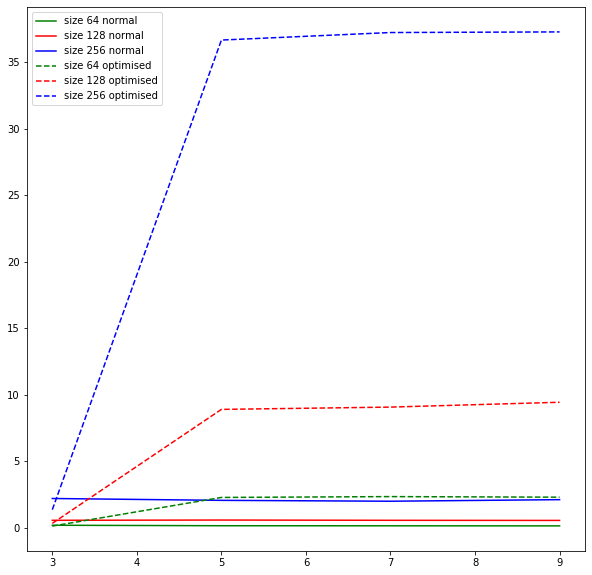

dashed line is optimised code and smooth line is normal code


In [155]:
plt.figure(figsize=(10,10))
plt.plot(k[:],out[0,:],color='green',label = "size "+str(d[0])+" normal")
plt.plot(k[:],out[1,:],color='red',label = "size "+str(d[1])+" normal")
plt.plot(k[:],out[2,:],color='blue',label = "size "+str(d[2])+" normal")

plt.plot(k[:],out1[0,:],color='green',linestyle='dashed',label = "size "+str(d[0])+" optimised")
plt.plot(k[:],out1[1,:],color='red',linestyle='dashed',label = "size "+str(d[1])+" optimised")
plt.plot(k[:],out1[2,:],color='blue',linestyle='dashed',label = "size "+str(d[2])+" optimised")
plt.legend()
plt.show()
print("dashed line is optimised code and smooth line is normal code")
